In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('../data/raw/housing.csv')

In [3]:
X_original = df.drop('median_house_value', axis=1).copy()
y_original = df['median_house_value'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.2, random_state=35
)

In [4]:
imputer = SimpleImputer(strategy='median')
X_train['total_bedrooms'] = imputer.fit_transform(X_train[['total_bedrooms']])
X_test['total_bedrooms'] = imputer.transform(X_test[['total_bedrooms']])

In [5]:
# Feature engineering - apply to both train and test
# Handle division by zero by replacing 0 with a small value or using np.where

# For rooms_per_household: avoid division by zero
X_train['rooms_per_household'] = np.where(
    X_train['households'] != 0,
    X_train['total_rooms'] / X_train['households'],
    0  # or X_train['total_rooms'] if households is 0
)

X_test['rooms_per_household'] = np.where(
    X_test['households'] != 0,
    X_test['total_rooms'] / X_test['households'],
    0
)

# For bedrooms_per_room: avoid division by zero
X_train['bedrooms_per_room'] = np.where(
    X_train['total_rooms'] != 0,
    X_train['total_bedrooms'] / X_train['total_rooms'],
    0
)

X_test['bedrooms_per_room'] = np.where(
    X_test['total_rooms'] != 0,
    X_test['total_bedrooms'] / X_test['total_rooms'],
    0
)

# For population_per_household: avoid division by zero
X_train['population_per_household'] = np.where(
    X_train['households'] != 0,
    X_train['population'] / X_train['households'],
    0
)

X_test['population_per_household'] = np.where(
    X_test['households'] != 0,
    X_test['population'] / X_test['households'],
    0
)

print("Feature engineering complete with division-by-zero handling")
X_train.head()

Feature engineering complete with division-by-zero handling


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,NEAR BAY,5.696478,0.184673,2.446618
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,INLAND,5.312457,0.204254,2.244384
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,<1H OCEAN,3.727700,0.264484,3.821596
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,NEAR OCEAN,4.589242,0.226958,1.968215
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,INLAND,4.462069,0.249356,2.935632


In [6]:
# ============================================
# ADVANCED FEATURE ENGINEERING
# ============================================

# Distance-based features (distance to approximate center of California)
# Using approximate center: longitude -118, latitude 36
X_train['distance_to_center'] = np.sqrt(
    (X_train['longitude'] - (-118.0))**2 + (X_train['latitude'] - 36.0)**2
)
X_test['distance_to_center'] = np.sqrt(
    (X_test['longitude'] - (-118.0))**2 + (X_test['latitude'] - 36.0)**2
)

# Income-related features
X_train['income_per_room'] = np.where(
    X_train['total_rooms'] != 0,
    X_train['median_income'] / X_train['total_rooms'],
    0
)
X_test['income_per_room'] = np.where(
    X_test['total_rooms'] != 0,
    X_test['median_income'] / X_test['total_rooms'],
    0
)

X_train['income_per_person'] = np.where(
    X_train['population'] != 0,
    X_train['median_income'] / X_train['population'],
    0
)
X_test['income_per_person'] = np.where(
    X_test['population'] != 0,
    X_test['median_income'] / X_test['population'],
    0
)

# Density features
X_train['household_density'] = np.where(
    X_train['population'] != 0,
    X_train['households'] / X_train['population'],
    0
)
X_test['household_density'] = np.where(
    X_test['population'] != 0,
    X_test['households'] / X_test['population'],
    0
)

# Age-related features (non-linear)
X_train['age_squared'] = X_train['housing_median_age'] ** 2
X_test['age_squared'] = X_test['housing_median_age'] ** 2

X_train['age_log'] = np.log1p(X_train['housing_median_age'])
X_test['age_log'] = np.log1p(X_test['housing_median_age'])

# Bedroom and room ratios
X_train['bedroom_ratio'] = np.where(
    X_train['households'] != 0,
    X_train['total_bedrooms'] / X_train['households'],
    0
)
X_test['bedroom_ratio'] = np.where(
    X_test['households'] != 0,
    X_test['total_bedrooms'] / X_test['households'],
    0
)

X_train['bedrooms_per_room'] = np.where(
    X_train['total_rooms'] != 0,
    X_train['total_bedrooms'] / X_train['total_rooms'],
    0
)
X_test['bedrooms_per_room'] = np.where(
    X_test['total_rooms'] != 0,
    X_test['total_bedrooms'] / X_test['total_rooms'],
    0
)

# Interaction features (important for non-linear models)
X_train['income_times_rooms'] = X_train['median_income'] * X_train['rooms_per_household']
X_test['income_times_rooms'] = X_test['median_income'] * X_test['rooms_per_household']

X_train['income_times_age'] = X_train['median_income'] * X_train['housing_median_age']
X_test['income_times_age'] = X_test['median_income'] * X_test['housing_median_age']

# Location interaction
X_train['lat_times_lon'] = X_train['latitude'] * X_train['longitude']
X_test['lat_times_lon'] = X_test['latitude'] * X_test['longitude']

print("Advanced feature engineering complete!")
print(f"New feature count - Train: {X_train.shape[1]}, Test: {X_test.shape[1]}")
print(f"\nNew features added: distance_to_center, income_per_room, income_per_person,")
print("household_density, age_squared, age_log, bedroom_ratio, bedrooms_per_room,")
print("income_times_rooms, income_times_age, lat_times_lon")

Advanced feature engineering complete!
New feature count - Train: 22, Test: 22

New features added: distance_to_center, income_per_room, income_per_person,
household_density, age_squared, age_log, bedroom_ratio, bedrooms_per_room,
income_times_rooms, income_times_age, lat_times_lon


In [7]:
# Outlier removal - apply to both sets
# Use boolean mask and reset indices to avoid alignment issues
mask_train = X_train['population_per_household'] < 20
X_train = X_train[mask_train].copy()
y_train = y_train[X_train.index].copy()

mask_test = X_test['population_per_household'] < 20
X_test = X_test[mask_test].copy()
y_test = y_test[X_test.index].copy()

# Reset indices for clean alignment
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(f"After outlier removal - Train: {X_train.shape}, Test: {X_test.shape}")

After outlier removal - Train: (16503, 22), Test: (4127, 22)


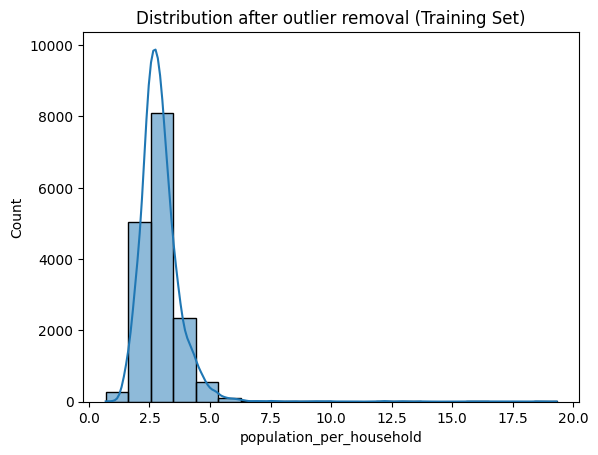

In [8]:
# Verify outlier removal
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(X_train['population_per_household'], bins=20, kde=True)
plt.title('Distribution after outlier removal (Training Set)')
plt.show()

In [9]:
# One-hot encoding - fit on train, transform on test
# Get dummies on training set first
X_train_encoded = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)

# Get dummies on test set
X_test_encoded = pd.get_dummies(X_test, columns=['ocean_proximity'], drop_first=False)

# Ensure test set has same columns as training set
# Add missing columns to test (fill with 0)
for col in X_train_encoded.columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0

# Remove any columns in test that aren't in train
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Update variables
X_train = X_train_encoded
X_test = X_test_encoded

print(f"Final shape - Train: {X_train.shape}, Test: {X_test.shape}")
print(f"\nColumns: {list(X_train.columns)}")

Final shape - Train: (16503, 25), Test: (4127, 25)

Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'distance_to_center', 'income_per_room', 'income_per_person', 'household_density', 'age_squared', 'age_log', 'bedroom_ratio', 'income_times_rooms', 'income_times_age', 'lat_times_lon', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [10]:
print("Data ready for modeling!")
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Data ready for modeling!
Train shape: (16503, 25)
Test shape: (4127, 25)


In [11]:
# Optional: Save preprocessed data
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)